In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 6.5 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
!pip install fbprophet

In [3]:
import yfinance
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [4]:
data = yfinance.download('MGLU3.SA', start='2018-01-01', end= datetime.datetime.today())
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2.528125,2.574375,2.450312,2.478125,2.390917,59427200
2018-01-03,2.468750,2.542500,2.422500,2.446875,2.360766,41385600
2018-01-04,2.500000,2.516250,2.478125,2.505625,2.417449,47936000
2018-01-05,2.514062,2.528437,2.448437,2.456250,2.369811,30684800
2018-01-08,2.453125,2.503437,2.448437,2.456562,2.370112,28796800
...,...,...,...,...,...,...
2022-03-28,6.550000,6.670000,6.390000,6.470000,6.470000,81990200
2022-03-29,6.680000,7.120000,6.680000,7.000000,7.000000,167686200
2022-03-30,7.010000,7.130000,6.730000,6.870000,6.870000,118907800


In [5]:
df = pd.DataFrame()

In [6]:
df['y'] = data['Close']
df['ds'] = data.index

In [7]:
df

,y,ds
Date,,
2018-01-02,2.478125,2018-01-02
2018-01-03,2.446875,2018-01-03
2018-01-04,2.505625,2018-01-04
2018-01-05,2.456250,2018-01-05
2018-01-08,2.456562,2018-01-08
...,...,...
2022-03-28,6.470000,2022-03-28
2022-03-29,7.000000,2022-03-29
2022-03-30,6.870000,2022-03-30


In [8]:
modelo = Prophet(daily_seasonality= True)

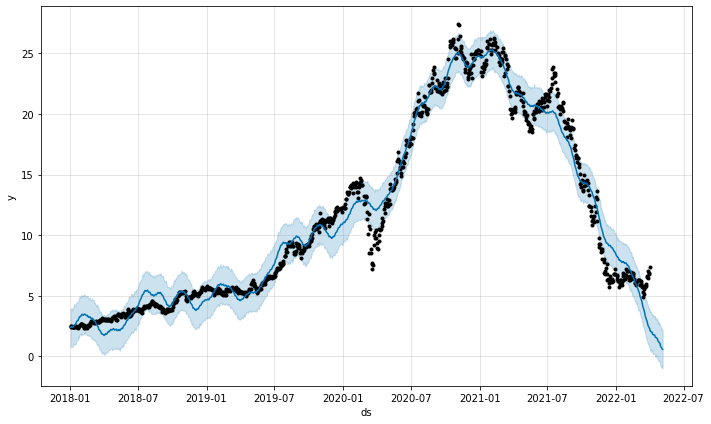

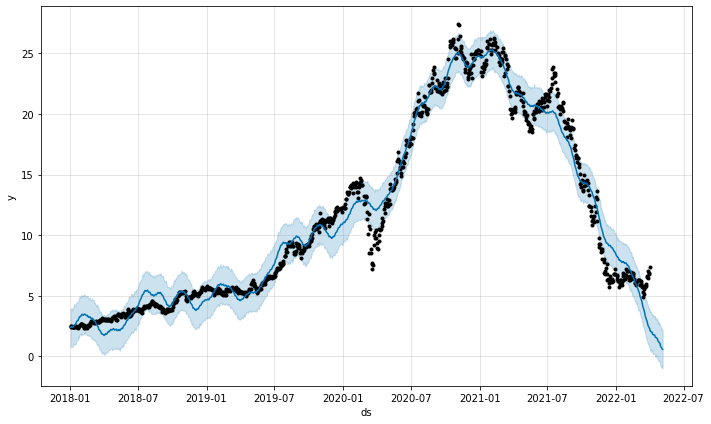

In [9]:
modelo.fit(df)
futuro = modelo.make_future_dataframe(periods= 35)
predictions = modelo.predict(futuro)
modelo.plot(predictions)

In [10]:
predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1082,2022-05-02,1.610868,-0.917643,2.366051,1.542604,1.686384,-0.866624,-0.866624,-0.866624,0.349277,...,-0.037683,-0.037683,-0.037683,-1.178219,-1.178219,-1.178219,0.0,0.0,0.0,0.744244
1083,2022-05-03,1.553314,-0.801621,2.183943,1.479368,1.634992,-0.836235,-0.836235,-0.836235,0.349277,...,0.005465,0.005465,0.005465,-1.190977,-1.190977,-1.190977,0.0,0.0,0.0,0.717079
1084,2022-05-04,1.495760,-0.902071,2.250011,1.417566,1.581339,-0.838081,-0.838081,-0.838081,0.349277,...,0.016483,0.016483,0.016483,-1.203841,-1.203841,-1.203841,0.0,0.0,0.0,0.657679
1085,2022-05-05,1.438207,-1.010202,2.238077,1.354108,1.528517,-0.833156,-0.833156,-0.833156,0.349277,...,0.033966,0.033966,0.033966,-1.216399,-1.216399,-1.216399,0.0,0.0,0.0,0.605051
1086,2022-05-06,1.380653,-0.931114,2.108355,1.289516,1.477672,-0.809875,-0.809875,-0.809875,0.349277,...,0.069089,0.069089,0.069089,-1.228241,-1.228241,-1.228241,0.0,0.0,0.0,0.570778
